# Purpose Of Notebook:

This notebook will work through the data science process after collecting the data (which was done in a previous step, and can be found in the *data_scraper.py* and *data_collection.py* files. 

We will first go through and get a sense of what sort of data we collected. From there I'll do an initial clean on the features I already know will cause some issues in the EDA step. 

Then I'll explore the data visually and see if I can uncover any patterns. Once the data has been thoroughly explored I'll create a custom transformation class which will be able to handle any transformations to the data, before going through and testing/selecting the best model.

## Table Of Contents:


### [Import Libraries](#Imports)

### [Read in the previously collected data](#Read-in-the-data)

### [Creating the train/test split](#Train-test-split)

### [Initial cleaning of features](#Initial-cleaning)

### [Exploratory Data Analysis](#EDA)

### Imports

Necessary libraries for the project.

In [62]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

### Read in the data

Since we have previously scraped our data to a CSV file *(using the data_scraper.py and data_collection.py files)*, we can simply read that file into this notebook to begin working with it.

In [63]:
# Read in data
data = pd.read_csv('skaters.csv')
data.head(3)

,season,team,name,birthday,age,nationality,height,weight,number,rookie,...,goals,pim,shots,shot_perc,games,hits,blocked,plusminus,shifts,points
0,20082009,New Jersey Devils,Travis Zajac,1985-05-13,35,CAN,"6' 2""",185,19,False,...,20,29,185,10.81,82,59,40,33,1895,62
1,20082009,New York Islanders,Johnny Boychuk,1984-01-19,36,CAN,"6' 2""",227,55,False,...,0,0,0,0.00,1,3,1,0,20,0
2,20082009,New York Islanders,Andrew Ladd,1985-12-12,34,CAN,"6' 3""",192,16,False,...,15,28,195,7.69,82,117,22,26,1803,49


In [64]:
# View info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 30 columns):
season            3612 non-null int64
team              3612 non-null object
name              3612 non-null object
birthday          3612 non-null object
age               3612 non-null int64
nationality       3612 non-null object
height            3612 non-null object
weight            3612 non-null int64
number            3612 non-null int64
rookie            3612 non-null bool
position_code     3612 non-null object
position_type     3612 non-null object
captain           3612 non-null bool
alternate_capt    3612 non-null bool
handedness        3612 non-null object
toi               3612 non-null object
pp_toi            3612 non-null object
sh_toi            3612 non-null object
ev_toi            3612 non-null object
assists           3612 non-null int64
goals             3612 non-null int64
pim               3612 non-null int64
shots             3612 non-null int64
shot_perc 

In [65]:
# Describe data
data.describe()

,season,age,weight,number,assists,goals,pim,shots,shot_perc,games,hits,blocked,plusminus,shifts,points
count,3.612000e+03,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000,3612.000000
mean,2.015050e+07,29.532115,201.444352,35.574474,18.464286,11.005537,30.476744,115.658915,8.373931,60.304540,75.400609,49.226467,0.941030,1366.592746,29.469823
std,2.823489e+04,3.922161,15.266395,27.081459,14.339520,10.120075,25.510675,74.787930,6.302526,25.307584,59.100301,42.510652,11.510202,667.595695,22.716278
min,2.008201e+07,20.000000,153.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-42.000000,5.000000,0.000000
25%,2.013201e+07,27.000000,191.000000,14.000000,7.000000,3.000000,13.000000,58.000000,4.350000,48.750000,32.000000,20.000000,-6.000000,924.250000,11.000000
50%,2.016202e+07,29.000000,200.000000,25.000000,16.000000,8.000000,26.000000,112.000000,8.180000,72.000000,63.000000,36.000000,0.000000,1539.500000,25.000000
75%,2.017202e+07,32.000000,211.000000,55.000000,27.000000,17.000000,42.000000,167.000000,11.812500,80.000000,106.000000,68.000000,8.000000,1858.500000,44.000000
max,2.018202e+07,43.000000,255.000000,98.000000,87.000000,60.000000,232.000000,528.000000,100.000000,84.000000,382.000000,283.000000,49.000000,2730.000000,128.000000


In [66]:
# Describe including non-numeric data
data.describe(include='O')

,team,name,birthday,nationality,height,position_code,position_type,handedness,toi,pp_toi,sh_toi,ev_toi
count,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612,3612
unique,31,702,648,17,17,4,2,2,3561,2884,2578,3524
top,New York Islanders,David Perron,1986-04-28,CAN,"6' 1""",D,Forward,L,34:15,00:00,00:00,967:34
freq,151,10,20,1703,732,1319,2293,2221,2,109,208,4


I can see that we have data for 702 different players, across 31 teams.

I already know that there are some transformations that I will need to make **prior** to the EDA step. This is because the data types are wrong, or some characters will need to be stripped out in order to be able to plot.

These transformations will go into my custom transformation class which I create below so that they can all be done simultaneously. 

### Train test split

I'll split the data out here so we can just explore the training data. I don't want to fit any transformers to test data, or taint it in any way. 

For this project, I will aim to predict the points per player for the most recent season of data that I have (2018/2019 season). Therefore I will use all previous seasons as training data.

In [67]:
# Create the train/test split
data_train = data[data['season'] != 20182019]
data_test = data[data['season'] == 20182019]

# Check proportions
print(f'Proportion of training data: {round(len(data_train)/len(data),2)*100}%')
print(f'Proportion of testing data: {round(len(data_test)/len(data),2)*100}%')

Proportion of training data: 81.0%
Proportion of testing data: 19.0%


### Initial cleaning

There were some features that came in as a different format than expected from the scraper. These will make the EDA more difficult as I won't be able to accurately plot anything or explore true correlations.

1) [**Age:**](#Age) The age column that was scraped is the players current age (at time of scraping). This will likely not be very useful when predicting points; what I was hoping to scrape out was the players age at the start of the season. Luckily, there are 2 columns that I can manipulate to arrive at this new feature. I'll have to assume that each season starts on October 1st every year (most start sometime early Oct), and simply take the difference in years between the players birthday and the date the season started.

2) [**Height:**](#Height) This was gathered as feet' inches" and transformed into an object datatype. While this makes sense to read, it will not be useful for a machine learning model. I'll therefore need to strip out all the extra characters and transform it into one number (inches) which can represent a players height.

3) [**Bools:**](#Converting-bools) There are a few features that came in as boolean values. I am not 100% sure if/how these will affect a machine learning model, however for the purposes of EDA I will just convert these to string values to make them easier to plot.

4) [**Time on ice:**](#Time-on-ice) The time on ice measures came in the form of minutes:seconds. For the purposes of this project I will perform a similar calculation as I did for height, and convert these numbers to only seconds - representing how many total seconds a player was on the ice for.

##### Age

In [70]:
# Create season start feature and transform that and birthday to DATETIMES
data_train['season_start'] = data_train['season'].apply(lambda x: pd.to_datetime(f"{str(x)[:4]}-10-01"))
data_train['birthday'] = data_train['birthday'].apply(lambda x: pd.to_datetime(str(x)))

# Find difference between dates, ÷ by 365 to get years and transform to INTEGER
data_train['age_season_start'] = round((data_train['season_start'] - data_train['birthday']).dt.days/365).astype(int)

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['season','name','season_start','birthday','age_season_start']]

,season,name,season_start,birthday,age_season_start
108,20092010,P.K. Subban,2009-10-01,1989-05-13,20
247,20102011,P.K. Subban,2010-10-01,1989-05-13,21
423,20112012,P.K. Subban,2011-10-01,1989-05-13,22
642,20132014,P.K. Subban,2013-10-01,1989-05-13,24
957,20142015,P.K. Subban,2014-10-01,1989-05-13,25
1326,20152016,P.K. Subban,2015-10-01,1989-05-13,26
1788,20162017,P.K. Subban,2016-10-01,1989-05-13,27
2325,20172018,P.K. Subban,2017-10-01,1989-05-13,28


##### Height

In [71]:
# Split feet' inches" to componenets and convert to total inches
data_train['inches'] = data_train['height'].apply(lambda x: (int(x[0])*12) + int(x.split(' ')[1].replace('"','')))

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['name','height','inches']]

,name,height,inches
108,P.K. Subban,"6' 0""",72
247,P.K. Subban,"6' 0""",72
423,P.K. Subban,"6' 0""",72
642,P.K. Subban,"6' 0""",72
957,P.K. Subban,"6' 0""",72
1326,P.K. Subban,"6' 0""",72
1788,P.K. Subban,"6' 0""",72
2325,P.K. Subban,"6' 0""",72


##### Converting bools

In [72]:
# Convert to STRING
data_train['rookie'] = data_train['rookie'].astype(str)
data_train['captain'] = data_train['captain'].astype(str)
data_train['alternate_capt'] = data_train['alternate_capt'].astype(str)

##### Time on ice

In [73]:
# Convert TOI measures to minutes
data_train['toi_secs'] = data_train['toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['pp_toi_secs'] = data_train['pp_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['sh_toi_secs'] = data_train['sh_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))
data_train['ev_toi_secs'] = data_train['ev_toi'].apply(lambda x: int(x.split(':')[0])*60 + int(x.split(':')[1]))

# Test new calculated field
data_train[data_train['name'] == 'P.K. Subban'][['name','toi','toi_secs','pp_toi','pp_toi_secs',
                                                 'sh_toi','sh_toi_secs', 'ev_toi','ev_toi_secs']]

,name,toi,toi_secs,pp_toi,pp_toi_secs,sh_toi,sh_toi_secs,ev_toi,ev_toi_secs
108,P.K. Subban,40:12,2412,08:27,507,00:56,56,30:49,1849
247,P.K. Subban,1714:41,102881,237:15,14235,195:27,11727,1281:59,76919
423,P.K. Subban,1968:28,118108,283:04,16984,211:42,12702,1473:42,88422
642,P.K. Subban,2018:32,121112,382:16,22936,55:02,3302,1581:14,94874
957,P.K. Subban,2148:40,128920,302:12,18132,177:17,10637,1669:11,100151
1326,P.K. Subban,1792:38,107558,313:51,18831,159:26,9566,1319:21,79161
1788,P.K. Subban,1610:40,96640,172:00,10320,137:57,8277,1300:43,78043
2325,P.K. Subban,1977:24,118644,253:23,15203,217:01,13021,1507:00,90420


In [74]:
# Check info and types again
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2932
Data columns (total 37 columns):
season              2933 non-null int64
team                2933 non-null object
name                2933 non-null object
birthday            2933 non-null datetime64[ns]
age                 2933 non-null int64
nationality         2933 non-null object
height              2933 non-null object
weight              2933 non-null int64
number              2933 non-null int64
rookie              2933 non-null object
position_code       2933 non-null object
position_type       2933 non-null object
captain             2933 non-null object
alternate_capt      2933 non-null object
handedness          2933 non-null object
toi                 2933 non-null object
pp_toi              2933 non-null object
sh_toi              2933 non-null object
ev_toi              2933 non-null object
assists             2933 non-null int64
goals               2933 non-null int64
pim                 2933 non-n

### EDA

Now that we have some better features, and columns that are of correct data types, I can start to explore some of them to see if I can unlock any potential patterns.

In [47]:
numerics = ['age','number', 'weight', 'pim','shots', 'shot_perc', 'games',
            'hits','blocked','plusminus','shifts','age_season_start','inches',
            'toi_mins','pp_toi_mins','sh_toi_mins','ev_toi_mins','points']

categorical = ['team', 'nationality', 'rookie','position_code', 'position_type','captain','alternate_capt',
              'handedness', ]

# Create new sub dataframes for plotting
df_num = data_train[numerics]
df_cat = data_train[categorical]

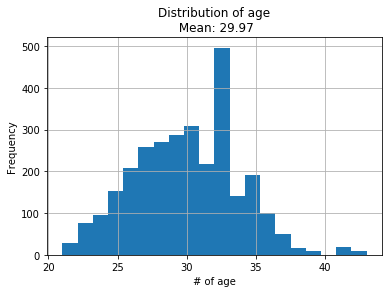

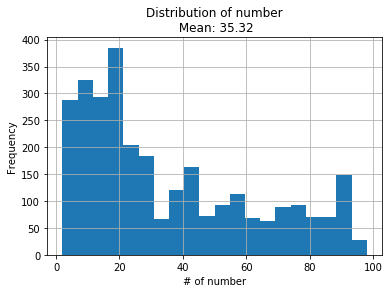

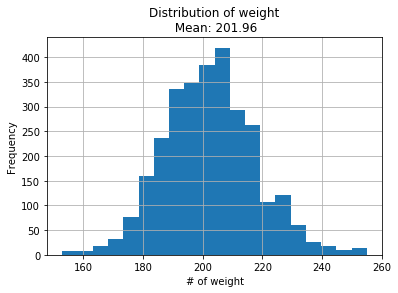

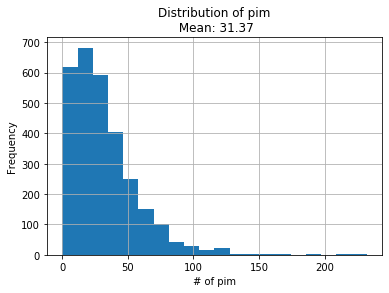

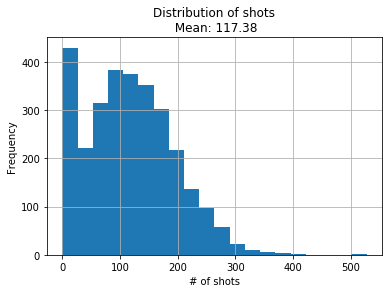

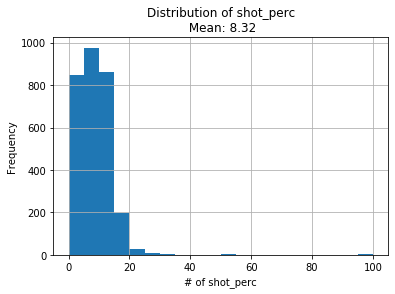

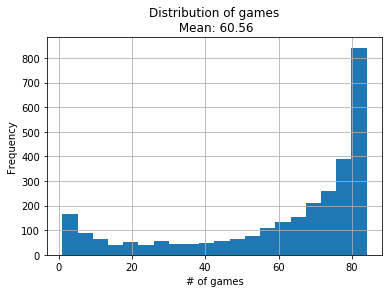

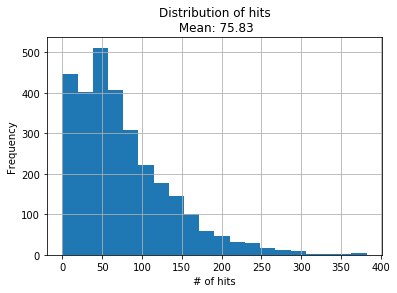

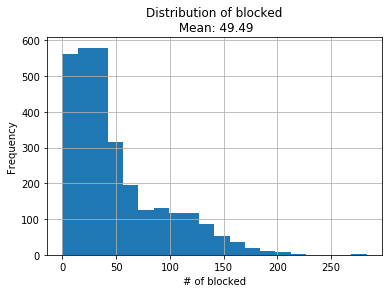

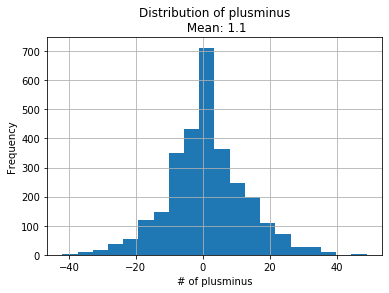

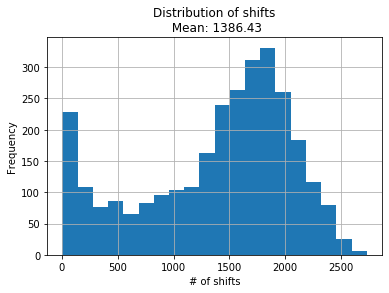

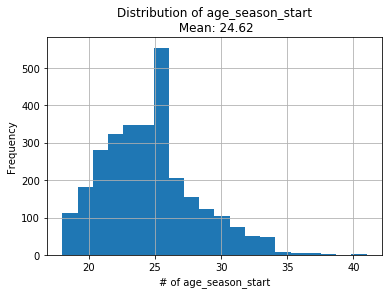

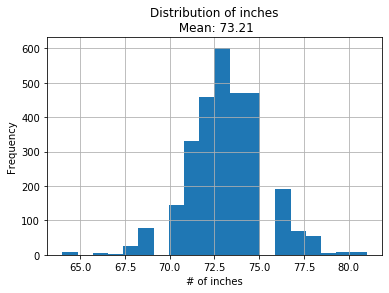

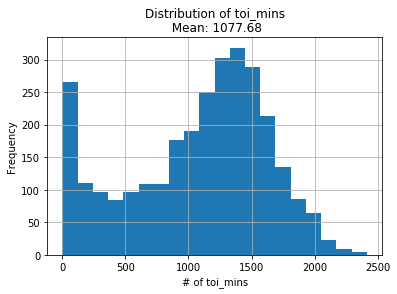

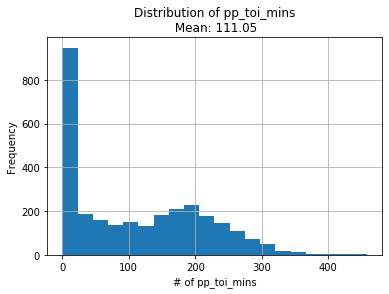

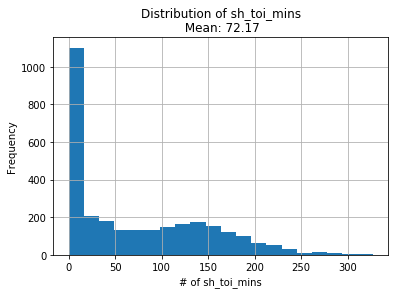

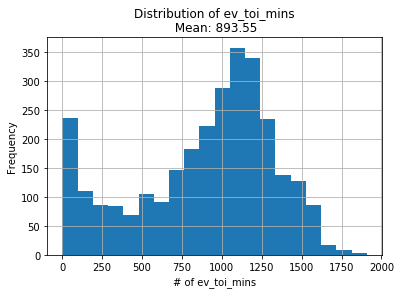

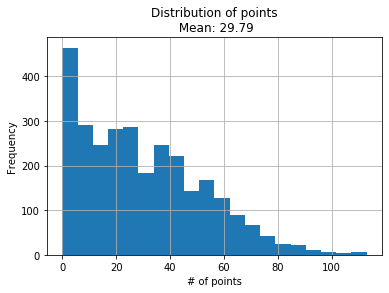

In [48]:
for i in df_num.columns:
    df_num[i].hist(bins=20)
    plt.title(f'Distribution of {i}\n Mean: {round(df_num[i].mean(),2)}', fontsize = 12)
    plt.ylabel('Frequency', fontsize=10)
    plt.xlabel(f'# of {i}', fontsize=10)
    plt.show()
    

I can see that the majority of our features are positively skewed. This may become an issue for some of our models later and I will keep this in mind as a potential way to improve performance. I may be able to transform these to normal distribution using the log function.

Other features such as age, plusminus, are relatively normally distributed already and shouldn't require much work.

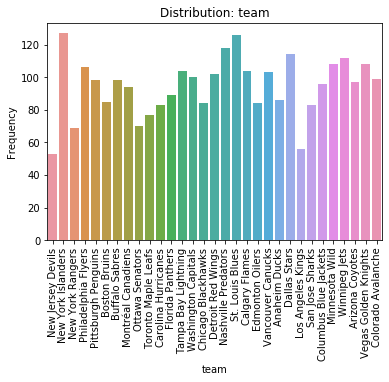

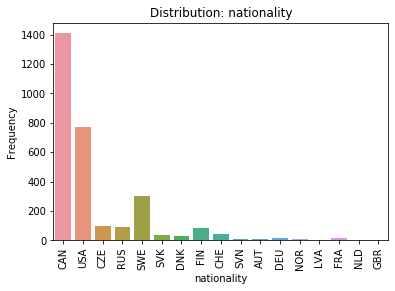

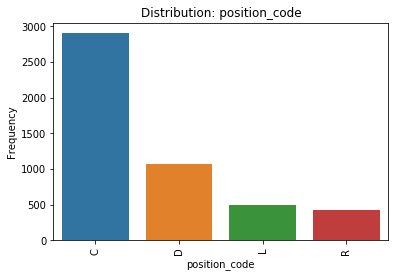

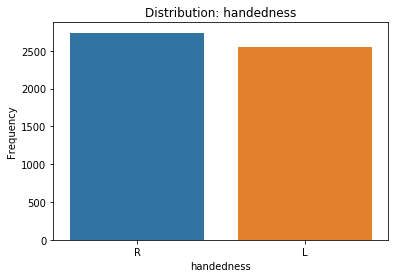

In [49]:
for i in df_cat.columns:
    sns.countplot(data=df_cat, x=i)
    plt.title(f'Distribution: {i}', fontsize=12)
    plt.xlabel(i, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    if df_cat[i].nunique() >= 4:
        plt.xticks(rotation=90)
    else:
        continue
    plt.show()
    

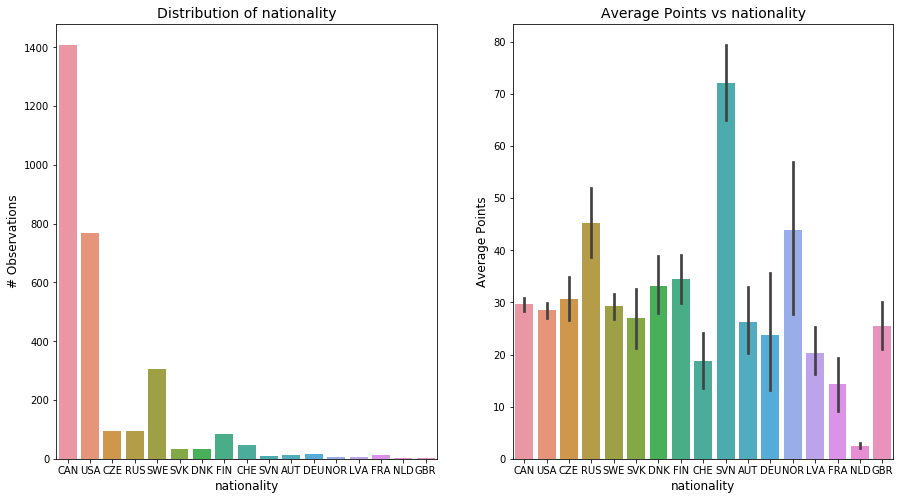

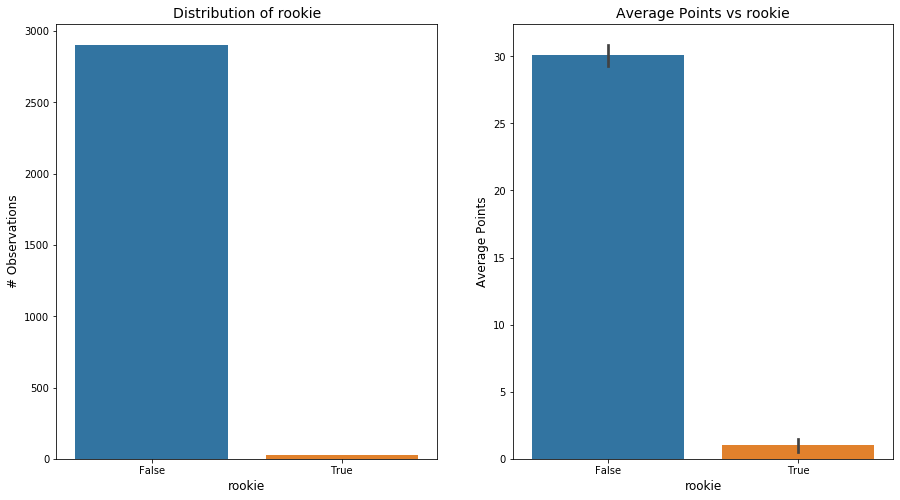

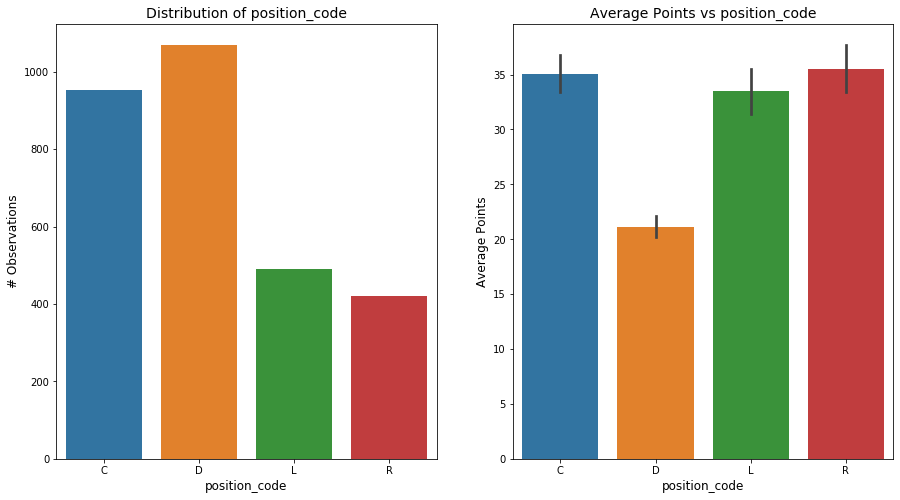

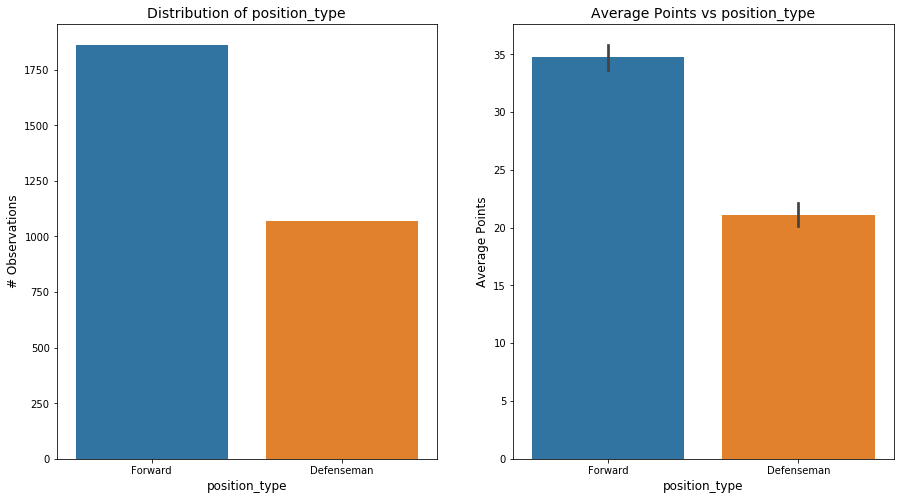

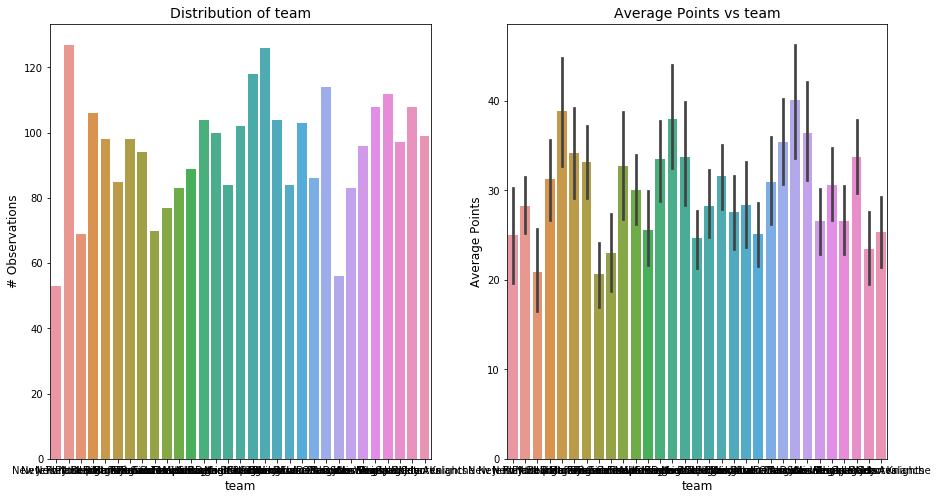

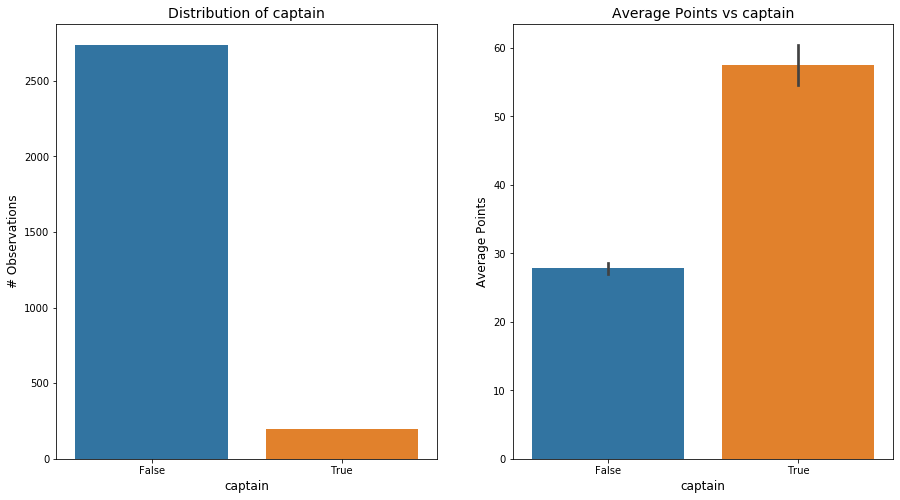

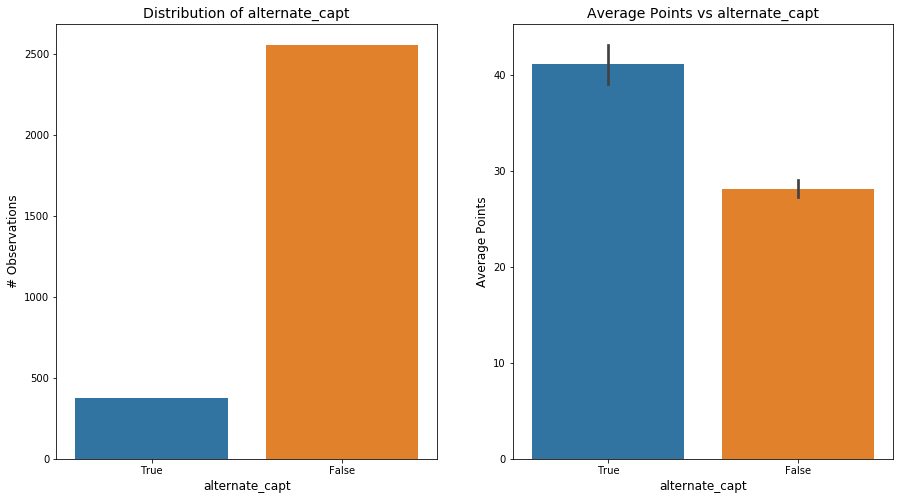

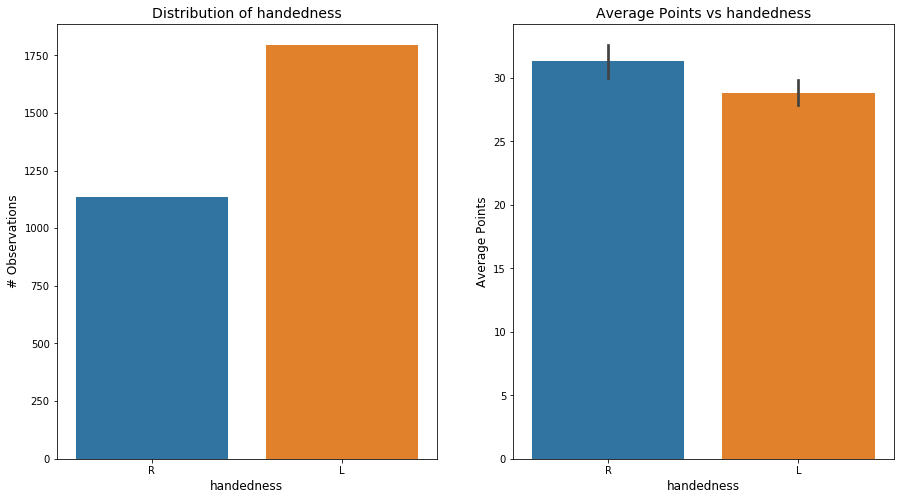

In [52]:
# Create DF to loop through to plot features against points
df_plot = data_train[['nationality', 'rookie', 'position_code', 
                      'position_type','team', 'captain', 'alternate_capt', 'handedness', 
                      'points']]


for feature in df_plot.columns:

    if feature != 'points':
        plt.figure(figsize=(15,8))

        # Plot Distribution
        plt.subplot(1,2,1)
        sns.countplot(df_plot[feature])
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('# Observations', fontsize=12)
        plt.title(f'Distribution of {feature}', fontsize=14);

        # Plot median price for each
        plt.subplot(1,2,2)
        sns.barplot(x = feature, y='points', data = df_plot)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Average Points', fontsize=12)
        plt.title(f'Average Points vs {feature}', fontsize=14);

    else:
        continue

In [13]:
data_train.columns

Index(['season', 'season_start', 'team', 'name', 'birthday', 'age',
       'nationality', 'height', 'weight', 'number', 'rookie', 'position_code',
       'position_type', 'captain', 'alternate_capt', 'handedness', 'toi',
       'pp_toi', 'sh_toi', 'ev_toi', 'assists', 'goals', 'pim', 'shots',
       'shot_perc', 'games', 'hits', 'blocked', 'plusminus', 'shifts',
       'points', 'age_season_start', 'inches'],
      dtype='object')